In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

def get_data(file):
    """Fetch data from disk"""
    
    data = pd.read_csv(file + '.csv', index_col='Date', parse_dates=['Date'])
    return data

def calc_corr(ser1, ser2, window):
    """Calculates correlation between two series"""
    
    ret1 = ser1.pct_change()
    ret2 = ser2.pct_change()
    corr = ret1.rolling(window).corr(ret2)
    return corr

# Define how many points we intend to plot. Points in this case would be trading days.
points_to_plot = 30

# Go get the log return data.
data = get_data('indexes')

# Rebase the two series to the same point in time, starting where the plot will start.
for ind in data:
    data[ind + '_rebased'] = (data[-points_to_plot:][ind].pct_change() + 1).cumprod()
    
# Relative strength, NDX to SP500
data['rel_str'] = data['NDX'] / data['SP500']

# Calculate 50 day rolling correlation
data['corr'] = calc_corr(data['NDX'], data['SP500'], 10)

# to look at the last number of rows we use tail(number),
# similarly, use head(number) to see the first number of rows
data.tail(20)

,SP500,NDX,SP500_rebased,NDX_rebased,rel_str,corr
Date,,,,,,
1996-04-09,456.22,56.22,0.998818,0.990486,0.123230,0.948633
1996-04-10,456.33,56.33,0.999059,0.992424,0.123441,0.948522
1996-04-11,234.33,34.33,0.513027,0.604827,0.146503,0.948522
1996-04-12,565.33,65.33,1.237696,1.150987,0.115561,0.948522
1996-04-13,456.33,56.33,0.999059,0.992424,0.123441,0.948522
1996-04-14,123.32,23.32,0.269989,0.410853,0.189102,0.973245
1996-04-15,234.34,34.34,0.513048,0.605004,0.146539,0.996519
1996-04-16,345.22,45.22,0.755802,0.796688,0.130989,0.995947
1996-04-17,456.22,56.22,0.998818,0.990486,0.123230,0.993204


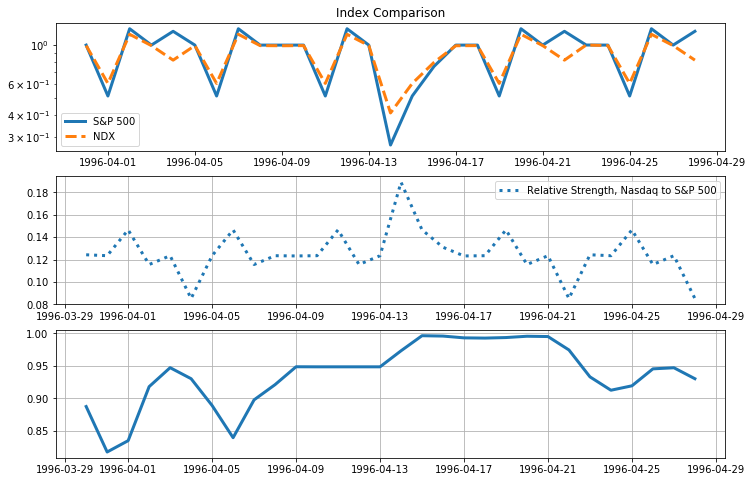

In [34]:
# You can use .to_clipboard() to copy to clipboard to paste into Excel etc.
data.to_clipboard()

# Slice [:] the data, cut points we don't intend to plot
plot_data = data[-points_to_plot:]

# Make new figure and set the size
fig = plt.figure(figsize=(12, 8))

# Subplotting
# The first subplot, planning for 3 plots high, 1 plot wide, this being the first.
ax = fig.add_subplot(311)
ax.set_title('Index Comparison')
ax.semilogy(plot_data['SP500_rebased'], linestyle='-', label='S&P 500', linewidth='3.0')
ax.semilogy(plot_data['NDX_rebased'], linestyle='--', label='NDX', linewidth='3.0')
ax.legend()
ax.grid(False)

# Second subplot
ax = fig.add_subplot(312)
ax.plot(plot_data['rel_str'], label='Relative Strength, Nasdaq to S&P 500', linestyle=':', linewidth=3.0)
ax.legend()
ax.grid(True)

#Third subplot
ax = fig.add_subplot(313)
ax.plot(plot_data['corr'], label='Correlation between Nasdaq and S&P 500', linestyle='-', linewidth=3.0)
ax.grid(True)